# Week 4

### 01 Assignment

[The assignment can be found here.](https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/04-Exercise.ipynb)

### 02 Status

I completed the necessary exercises.


### 03 Solutions

In [6]:
# 1.1
import numpy as np

filename = '../../data/befkbhalderstatkode.csv'
population_data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(population_data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [8]:
# 1.2
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
dd = population_data

def get_pop_by_area(neighborhoods, mask):
    sum_of_people = {}
    for neighborhood in neighborhoods.keys():
        people = dd[mask & (dd[:,1] == neighborhood)] 
        sum_of_people[neighborhoods[neighborhood]] = people[:,4].sum()
    return sum_of_people

def print_dict(dict):
    for key, value in dict.items():
        print(key, ":" ,value)
        
mask = (dd[:,0] == 2015)
print_dict(get_pop_by_area(neighb, mask))

Indre By : 51937
Østerbro : 75113
Nørrebro : 78802
Vesterbro/Kgs. Enghave : 61623
Valby : 51727
Vanløse : 39537
Brønshøj-Husum : 43908
Bispebjerg : 53604
Amager Øst : 55205
Amager Vest : 64967
Udenfor : 3872


Text(0.5, 1.0, 'Size of city areas')

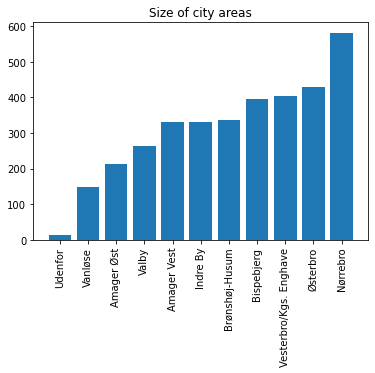

In [16]:
# 1.3
import matplotlib.pyplot as plt

data = get_pop_by_area(neighb, mask)
population = sorted(data.values()) 
areas = sorted(data, key=data.get)

plt.bar(areas, population)
plt.xticks(rotation=90)
plt.title("Size of city areas")

In [14]:
# 1.4
mask = (dd[:,0] == 2015) & (dd[:,2] > 65)

print_dict(get_pop_by_area(neighb, mask))

Indre By : 6818
Østerbro : 8370
Nørrebro : 5059
Vesterbro/Kgs. Enghave : 3984
Valby : 5397
Vanløse : 4668
Brønshøj-Husum : 5461
Bispebjerg : 4945
Amager Øst : 5027
Amager Vest : 5971
Udenfor : 50


In [15]:
# 1.5
mask = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:,3] != 5100)

print_dict(get_pop_by_area(neighb, mask))

Indre By : 332
Østerbro : 430
Nørrebro : 582
Vesterbro/Kgs. Enghave : 405
Valby : 263
Vanløse : 149
Brønshøj-Husum : 337
Bispebjerg : 395
Amager Øst : 213
Amager Vest : 331
Udenfor : 14


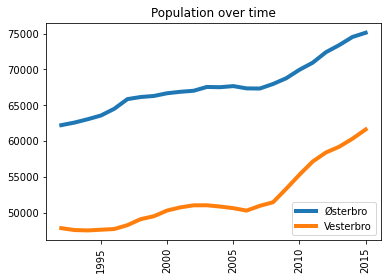

In [21]:
# 1.6
city_østerbro = (dd[:,1] == 2) 
city_vesterbro = (dd[:,1] == 4) 
set_of_years = np.unique(dd[:,0])
østerbro = np.array([np.sum(dd[city_østerbro & (dd[:,0] == year)][:,4]) 
                      for year in set_of_years])
vesterbro = np.array([np.sum(dd[city_vesterbro & (dd[:,0] == year)][:,4]) 
                      for year in set_of_years])


p1 = plt.plot(set_of_years, østerbro, linewidth=4, label="Østerbro")
p2 = plt.plot(set_of_years, vesterbro, linewidth=4, label="Vesterbro")
plt.title("Population over time")
plt.xticks(rotation=90)
plt.legend(loc=4)